C:\Users\mypc\Anaconda3\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())
C:\Users\mypc\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


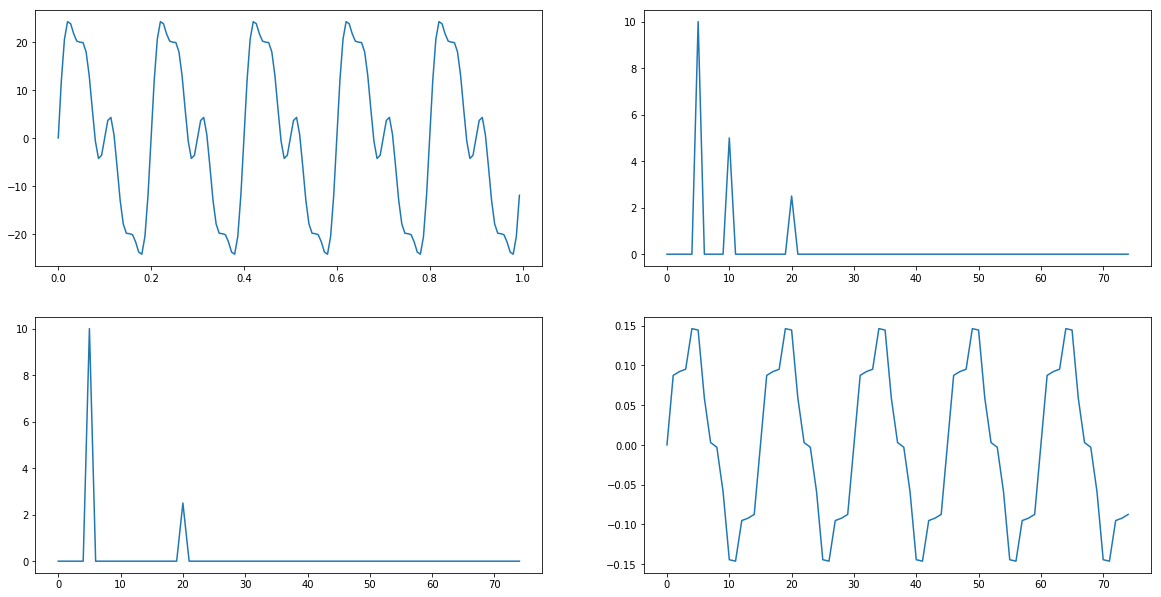

In [20]:
import myplot
import random
import numpy as np

Fs = 150.0;  # sampling rate
Ts = 1.0/Fs; # sampling interval
t = np.arange(0,1,Ts) # time vector

freq1 = 5   # frequency of the signal
freq2 = 10  # frequency of the signal
freq3 = 20  # frequency of the signal

amp1 = 20
amp2 = 10
amp3 = 5

wave1 = amp1*np.sin(2*np.pi*freq1*t)
wave2 = amp2*np.sin(2*np.pi*freq2*t)
wave3 = amp3*np.sin(2*np.pi*freq3*t)
signal = wave1 + wave2 + wave3

mplot1 = myplot.MyPlot()
mplot1.crossplot(t,signal)

n = len(signal) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(n//2)] # one side frequency range

fftsignal = np.fft.fft(signal)/n # fft computing and normalization
fftsignal = fftsignal[range(n//2)]


mplot1.crossplot(frq,abs(fftsignal))

filteredfft = fftsignal.copy()
filteredfft[np.abs(frq) == 10] = 0

mplot1.crossplot(frq,abs(filteredfft))

filteredsignal = np.fft.ifft(filteredfft)

#print(filteredsignal)
mplot1.plot(filteredsignal)




In [21]:
pop_csv = "..\\..\\..\\Data\\pop.csv"
import pandas as pd
from pandas import DataFrame as df

pop_df = pd.read_csv(pop_csv)
pop_df.head()


,Place,2010,2011,2012,2013,2014,2015
0,AA,9568,1271,300,100,50,400
1,BB,5056,4358,300,100,50,400
2,CC,9951,3349,300,100,50,400
3,DD,9985,4117,300,100,50,400


In [22]:
maxdiff_lambda = lambda row : max(row.iloc[1:7]) - min( row.iloc[1:7])


pop_df["Diff"] = pop_df.apply(maxdiff_lambda, axis=1)
pop_df.head()

,Place,2010,2011,2012,2013,2014,2015,Diff
0,AA,9568,1271,300,100,50,400,9518
1,BB,5056,4358,300,100,50,400,5006
2,CC,9951,3349,300,100,50,400,9901
3,DD,9985,4117,300,100,50,400,9935


In [23]:
pop_df["Place"] [pop_df["Diff"].idxmax()]

'DD'

In [24]:
pop_csv = "..\\..\\..\\Data\\pop2.csv"
pop2_df = pd.read_csv(pop_csv)
pop2_df.head(10)

,STATENAME,Pop,year
0,AA,100,2015
1,AA,100,2016
2,AA,100,2017
3,AA,100,2015
4,AA,100,2015
5,AA,100,2018
6,BB,200,2019
7,BB,200,2020
8,BB,200,2021
9,BB,300,2021


In [25]:
pop2_df.groupby(["STATENAME"]).sum()["Pop"].idxmax()

'BB'

In [26]:
 pop2_df.groupby(["STATENAME"]).count()["Pop"].idxmax()

'AA'